In [134]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [135]:
data = pd.read_csv('C:/Users/USER/OneDrive - Universidad de los andes/Analitica comp/proyecto3-data-trio/reportes/ingeniera_de_datos/clean_saber11.csv', sep=',')


In [136]:
data.shape

(83395, 31)

In [137]:
data.columns

Index(['Unnamed: 0', 'periodo', 'estu_tipodocumento', 'cole_area_ubicacion',
       'cole_bilingue', 'cole_calendario', 'cole_caracter', 'cole_genero',
       'cole_jornada', 'cole_mcpio_ubicacion', 'cole_naturaleza',
       'cole_sede_principal', 'estu_estadoinvestigacion',
       'estu_fechanacimiento', 'estu_genero', 'fami_cuartoshogar',
       'fami_educacionmadre', 'fami_educacionpadre', 'fami_estratovivienda',
       'fami_personashogar', 'fami_tieneautomovil', 'fami_tienecomputador',
       'fami_tieneinternet', 'fami_tienelavadora', 'desemp_ingles',
       'punt_ingles', 'punt_matematicas', 'punt_sociales_ciudadanas',
       'punt_c_naturales', 'punt_lectura_critica', 'punt_global'],
      dtype='object')

In [138]:
data.dtypes

Unnamed: 0                    int64
periodo                       int64
estu_tipodocumento           object
cole_area_ubicacion          object
cole_bilingue                object
cole_calendario              object
cole_caracter                object
cole_genero                  object
cole_jornada                 object
cole_mcpio_ubicacion         object
cole_naturaleza              object
cole_sede_principal          object
estu_estadoinvestigacion     object
estu_fechanacimiento         object
estu_genero                  object
fami_cuartoshogar            object
fami_educacionmadre          object
fami_educacionpadre          object
fami_estratovivienda         object
fami_personashogar           object
fami_tieneautomovil          object
fami_tienecomputador         object
fami_tieneinternet           object
fami_tienelavadora           object
desemp_ingles                object
punt_ingles                 float64
punt_matematicas            float64
punt_sociales_ciudadanas    

In [139]:
data.describe()

,Unnamed: 0,periodo,punt_ingles,punt_matematicas,punt_sociales_ciudadanas,punt_c_naturales,punt_lectura_critica,punt_global
count,83395.000000,83395.000000,83395.000000,83395.000000,83395.000000,83395.000000,83395.000000,83395.000000
mean,42194.574459,20174.116014,49.403369,50.884909,49.224318,50.815133,51.682043,252.778068
std,24368.602134,27.215038,10.716273,11.558453,11.117363,10.023473,9.863217,47.048934
min,0.000000,20142.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
25%,21082.500000,20152.000000,42.000000,43.000000,41.000000,44.000000,45.000000,218.000000
50%,42183.000000,20172.000000,48.000000,50.000000,49.000000,50.000000,51.000000,249.000000
75%,63302.500000,20194.000000,55.000000,58.000000,57.000000,58.000000,58.000000,283.000000
max,84396.000000,20224.000000,100.000000,100.000000,100.000000,100.000000,100.000000,469.000000


In [140]:
data.head()

,Unnamed: 0,periodo,estu_tipodocumento,cole_area_ubicacion,cole_bilingue,cole_calendario,cole_caracter,cole_genero,cole_jornada,cole_mcpio_ubicacion,...,fami_tienecomputador,fami_tieneinternet,fami_tienelavadora,desemp_ingles,punt_ingles,punt_matematicas,punt_sociales_ciudadanas,punt_c_naturales,punt_lectura_critica,punt_global
0,0,20224,TI,RURAL,N,A,ACADÉMICO,MIXTO,MAÑANA,GARZÓN,...,Si,Si,Si,A-,42.0,64.0,47,41,49,248
1,1,20224,TI,RURAL,N,A,ACADÉMICO,MIXTO,COMPLETA,PALERMO,...,No,Si,No,A-,31.0,33.0,35,31,36,168
2,2,20224,CC,URBANO,N,A,ACADÉMICO,MIXTO,SABATINA,PITALITO,...,No,No,Si,A-,43.0,58.0,59,56,64,290
3,3,20224,TI,URBANO,N,A,ACADÉMICO,MIXTO,UNICA,NEIVA,...,unknown,Si,unknown,B1,70.0,59.0,66,57,67,314
4,4,20224,CC,URBANO,N,A,TÉCNICO/ACADÉMICO,MIXTO,UNICA,GARZÓN,...,No,No,Si,A-,42.0,36.0,53,45,61,241


In [141]:
# # Create a new DataFrame excluding the specified columns
# columns_to_drop = [
#     'estu_consecutivo', 'cole_cod_depto_ubicacion', 'cole_cod_dane_establecimiento',
#     'cole_cod_dane_sede', 'cole_depto_ubicacion', 'estu_cod_depto_presentacion',
#     'estu_cod_reside_depto', 'estu_depto_reside', 'estu_depto_presentacion',
#     'estu_estudiante', 'estu_nacionalidad', 'estu_privado_libertad', 'rn'
# ]

# data1 = data.drop(columns=columns_to_drop)

In [142]:
data1= data

In [143]:
data1.shape

(83395, 31)

In [144]:
data1 = data1[data1['estu_estadoinvestigacion']=='PUBLICAR']

In [145]:
data1 = data1[data1['cole_calendario']=='A']

In [146]:
data1 = data1.drop(columns='cole_calendario')

In [147]:
data1.shape

(83297, 30)

In [148]:
data1 = data1[data1['fami_cuartoshogar'] != 'Seis o mas']

In [149]:
# Convert columns to strings first
data1['periodo'] = data1['periodo'].astype(str)
data1['estu_fechanacimiento'] = data1['estu_fechanacimiento'].astype(str)

# Extract first 4 characters of 'periodo' and last 4 characters of 'estu_fechanacimiento'
data1['periodo_year'] = data1['periodo'].str[:4].astype(int)
data1['birth_year'] = data1['estu_fechanacimiento'].str[-4:].astype(int)

# Create new column with the subtraction
data1['age_at_period'] = data1['periodo_year'] - data1['birth_year']

In [150]:
data1.head()

,Unnamed: 0,periodo,estu_tipodocumento,cole_area_ubicacion,cole_bilingue,cole_caracter,cole_genero,cole_jornada,cole_mcpio_ubicacion,cole_naturaleza,...,desemp_ingles,punt_ingles,punt_matematicas,punt_sociales_ciudadanas,punt_c_naturales,punt_lectura_critica,punt_global,periodo_year,birth_year,age_at_period
0,0,20224,TI,RURAL,N,ACADÉMICO,MIXTO,MAÑANA,GARZÓN,OFICIAL,...,A-,42.0,64.0,47,41,49,248,2022,2004,18
2,2,20224,CC,URBANO,N,ACADÉMICO,MIXTO,SABATINA,PITALITO,NO OFICIAL,...,A-,43.0,58.0,59,56,64,290,2022,2003,19
3,3,20224,TI,URBANO,N,ACADÉMICO,MIXTO,UNICA,NEIVA,OFICIAL,...,B1,70.0,59.0,66,57,67,314,2022,2006,16
4,4,20224,CC,URBANO,N,TÉCNICO/ACADÉMICO,MIXTO,UNICA,GARZÓN,OFICIAL,...,A-,42.0,36.0,53,45,61,241,2022,2003,19
5,5,20224,TI,URBANO,N,TÉCNICO/ACADÉMICO,MIXTO,UNICA,HOBO,OFICIAL,...,A1,53.0,50.0,59,56,58,278,2022,2005,17


In [151]:
data1 = data1.drop(columns='periodo_year')

In [152]:
data1 = data1.drop(columns='Unnamed: 0')

In [153]:
data1 = data1.drop(columns='estu_tipodocumento')

In [154]:
data1 = data1.drop(columns='birth_year')

In [155]:
data1 = data1.drop(columns='cole_sede_principal')

In [156]:
data1 = data1.drop(columns='estu_estadoinvestigacion')

In [157]:
data1 = data1.drop(columns='desemp_ingles')

In [158]:
data1 = data1.drop(columns='estu_fechanacimiento')

In [159]:
tiene = {'No': 0,'Si': 1,'unknown': 2}
data1["fami_tieneinternet"] = data1["fami_tieneinternet"].map(tiene)
data1["fami_tienelavadora"] = data1["fami_tienelavadora"].map(tiene)
data1['fami_tieneautomovil'] = data1['fami_tieneautomovil'].map(tiene)
data1['fami_tienecomputador'] = data1['fami_tienecomputador'].map(tiene)

In [160]:
estrato = {'Estrato 1': 1,'Estrato 2': 2,'Estrato 3': 3,'Estrato 4': 4,'Estrato 5': 5,'Estrato 6': 6,'Sin Estrato': 0 }
data1["fami_estratovivienda"] = data1["fami_estratovivienda"].map(estrato)

In [161]:
miembros = { 'unknown': 0, 'Uno': 1 , "Dos": 2, 'Tres': 3, 'Cuatro': 4, 'Cinco': 5, 'Seis': 6, 'Siete': 7, 'Ocho': 8, 'Nueve': 9, 'Diez o más': 10}
data1["fami_cuartoshogar"] = data1["fami_cuartoshogar"].map(miembros)

In [162]:
zona = {'RURAL': 0,'URBANO': 1}
data1["cole_area_ubicacion"] = data1["cole_area_ubicacion"].map(zona)


In [163]:
data1.head()

,periodo,cole_area_ubicacion,cole_bilingue,cole_caracter,cole_genero,cole_jornada,cole_mcpio_ubicacion,cole_naturaleza,estu_genero,fami_cuartoshogar,...,fami_tienecomputador,fami_tieneinternet,fami_tienelavadora,punt_ingles,punt_matematicas,punt_sociales_ciudadanas,punt_c_naturales,punt_lectura_critica,punt_global,age_at_period
0,20224,0,N,ACADÉMICO,MIXTO,MAÑANA,GARZÓN,OFICIAL,M,3,...,1,1,1,42.0,64.0,47,41,49,248,18
2,20224,1,N,ACADÉMICO,MIXTO,SABATINA,PITALITO,NO OFICIAL,F,3,...,0,0,1,43.0,58.0,59,56,64,290,19
3,20224,1,N,ACADÉMICO,MIXTO,UNICA,NEIVA,OFICIAL,M,0,...,2,1,2,70.0,59.0,66,57,67,314,16
4,20224,1,N,TÉCNICO/ACADÉMICO,MIXTO,UNICA,GARZÓN,OFICIAL,F,2,...,0,0,1,42.0,36.0,53,45,61,241,19
5,20224,1,N,TÉCNICO/ACADÉMICO,MIXTO,UNICA,HOBO,OFICIAL,F,2,...,0,1,1,53.0,50.0,59,56,58,278,17


In [164]:
target="punt_global"
x_cols= [x for x in data1.columns  if x != target ]


In [165]:
#data=data[x_cols+[target]]

In [166]:
data1.isna().sum()

periodo                     0
cole_area_ubicacion         0
cole_bilingue               0
cole_caracter               0
cole_genero                 0
cole_jornada                0
cole_mcpio_ubicacion        0
cole_naturaleza             0
estu_genero                 0
fami_cuartoshogar           0
fami_educacionmadre         0
fami_educacionpadre         0
fami_estratovivienda        0
fami_personashogar          0
fami_tieneautomovil         0
fami_tienecomputador        0
fami_tieneinternet          0
fami_tienelavadora          0
punt_ingles                 0
punt_matematicas            0
punt_sociales_ciudadanas    0
punt_c_naturales            0
punt_lectura_critica        0
punt_global                 0
age_at_period               0
dtype: int64

In [167]:
# data1.to_csv("saber11reducida.csv")

## Exploración

In [168]:
#sns.pairplot(data1,)

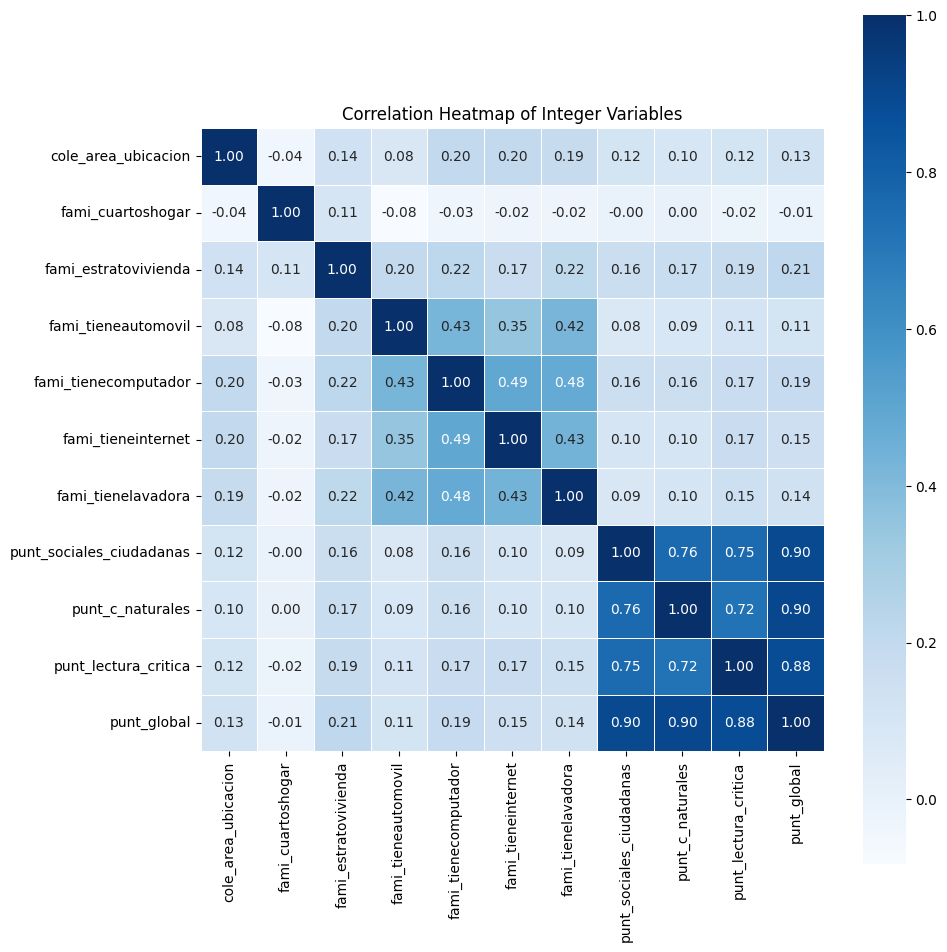

Columns used in correlation:
['cole_area_ubicacion', 'fami_cuartoshogar', 'fami_estratovivienda', 'fami_tieneautomovil', 'fami_tienecomputador', 'fami_tieneinternet', 'fami_tienelavadora', 'punt_sociales_ciudadanas', 'punt_c_naturales', 'punt_lectura_critica', 'punt_global']


In [169]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only int64 columns
int64_columns = data1.select_dtypes(include=['int64']).columns

# Calculate correlation matrix for int64 columns
corr = data1[int64_columns].corr()

# Create heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr, cmap="Blues", annot=True, cbar=True, square=True, fmt='.2f', 
            linewidths=0.5)
plt.title('Correlation Heatmap of Integer Variables')
plt.tight_layout()
plt.show()

# Print the list of int64 columns used in the correlation
print("Columns used in correlation:")
print(list(int64_columns))

<Axes: >

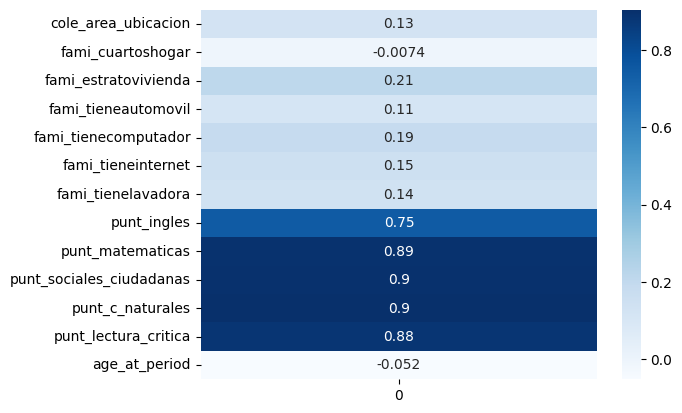

In [170]:
corrw = data1.select_dtypes(exclude=['object']).drop([target], axis=1).corrwith(data1[target])
sns.heatmap(pd.DataFrame(corrw), cmap="Blues", annot=True)

## Ajustes basados en correlación

In [171]:
data2 = data1.drop(columns='fami_cuartoshogar')

In [172]:
data2 = data2.drop(columns='age_at_period')

In [173]:
data2.head()

,periodo,cole_area_ubicacion,cole_bilingue,cole_caracter,cole_genero,cole_jornada,cole_mcpio_ubicacion,cole_naturaleza,estu_genero,fami_educacionmadre,...,fami_tieneautomovil,fami_tienecomputador,fami_tieneinternet,fami_tienelavadora,punt_ingles,punt_matematicas,punt_sociales_ciudadanas,punt_c_naturales,punt_lectura_critica,punt_global
0,20224,0,N,ACADÉMICO,MIXTO,MAÑANA,GARZÓN,OFICIAL,M,Secundaria (Bachillerato) completa,...,0,1,1,1,42.0,64.0,47,41,49,248
2,20224,1,N,ACADÉMICO,MIXTO,SABATINA,PITALITO,NO OFICIAL,F,Secundaria (Bachillerato) completa,...,0,0,0,1,43.0,58.0,59,56,64,290
3,20224,1,N,ACADÉMICO,MIXTO,UNICA,NEIVA,OFICIAL,M,Ninguno,...,2,2,1,2,70.0,59.0,66,57,67,314
4,20224,1,N,TÉCNICO/ACADÉMICO,MIXTO,UNICA,GARZÓN,OFICIAL,F,Primaria completa,...,0,0,0,1,42.0,36.0,53,45,61,241
5,20224,1,N,TÉCNICO/ACADÉMICO,MIXTO,UNICA,HOBO,OFICIAL,F,Secundaria (Bachillerato) completa,...,0,0,1,1,53.0,50.0,59,56,58,278


In [174]:
data2.columns

Index(['periodo', 'cole_area_ubicacion', 'cole_bilingue', 'cole_caracter',
       'cole_genero', 'cole_jornada', 'cole_mcpio_ubicacion',
       'cole_naturaleza', 'estu_genero', 'fami_educacionmadre',
       'fami_educacionpadre', 'fami_estratovivienda', 'fami_personashogar',
       'fami_tieneautomovil', 'fami_tienecomputador', 'fami_tieneinternet',
       'fami_tienelavadora', 'punt_ingles', 'punt_matematicas',
       'punt_sociales_ciudadanas', 'punt_c_naturales', 'punt_lectura_critica',
       'punt_global'],
      dtype='object')

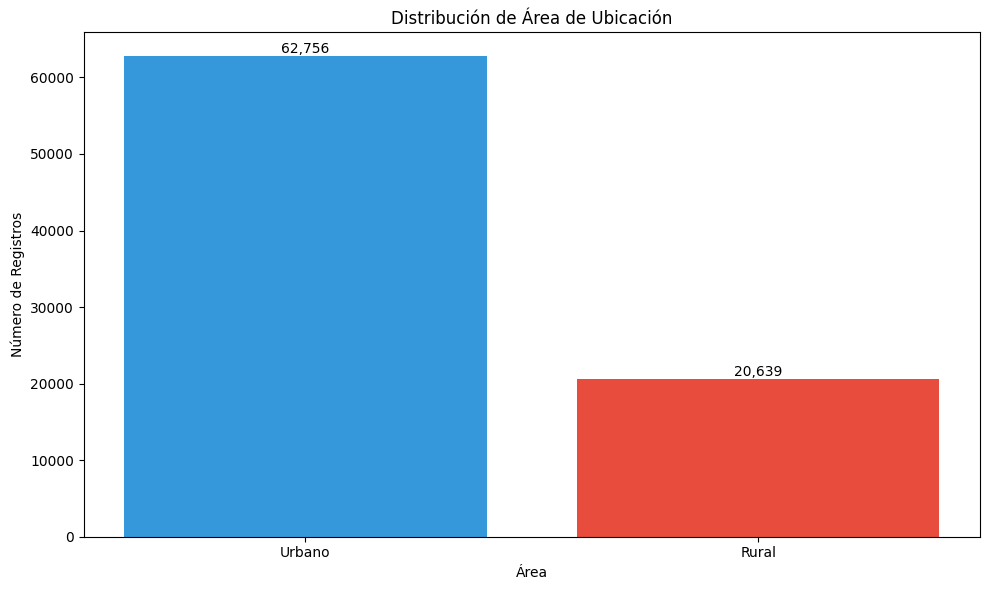

cole_area_ubicacion
URBANO    62756
RURAL     20639
Name: count, dtype: int64


In [175]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data with custom labels
area_counts = data['cole_area_ubicacion'].value_counts()
custom_labels = ['Urbano', 'Rural']

# Create a bar plot with custom colors
plt.figure(figsize=(10, 6))
bars = plt.bar(custom_labels, area_counts, color=['#3498db', '#e74c3c'])  # Blue for Urbano, Red for Rural

plt.title('Distribución de Área de Ubicación')
plt.xlabel('Área')
plt.ylabel('Número de Registros')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:,.0f}', 
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print the value counts for additional context
print(data['cole_area_ubicacion'].value_counts())

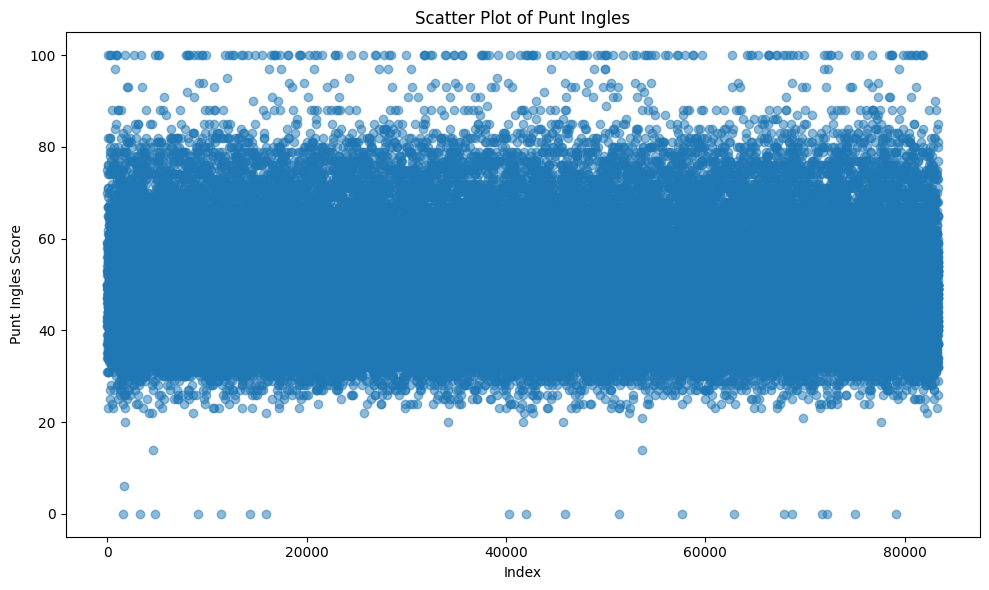

In [176]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data.index, data['punt_ingles'], alpha=0.5)
plt.title('Scatter Plot of Punt Ingles')
plt.xlabel('Index')
plt.ylabel('Punt Ingles Score')
plt.tight_layout()
plt.show()



C:\Users\USER\AppData\Local\Temp\ipykernel_1744\1666397295.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=proportions.index.map(custom_labels), y=proportions.values, palette=colors)


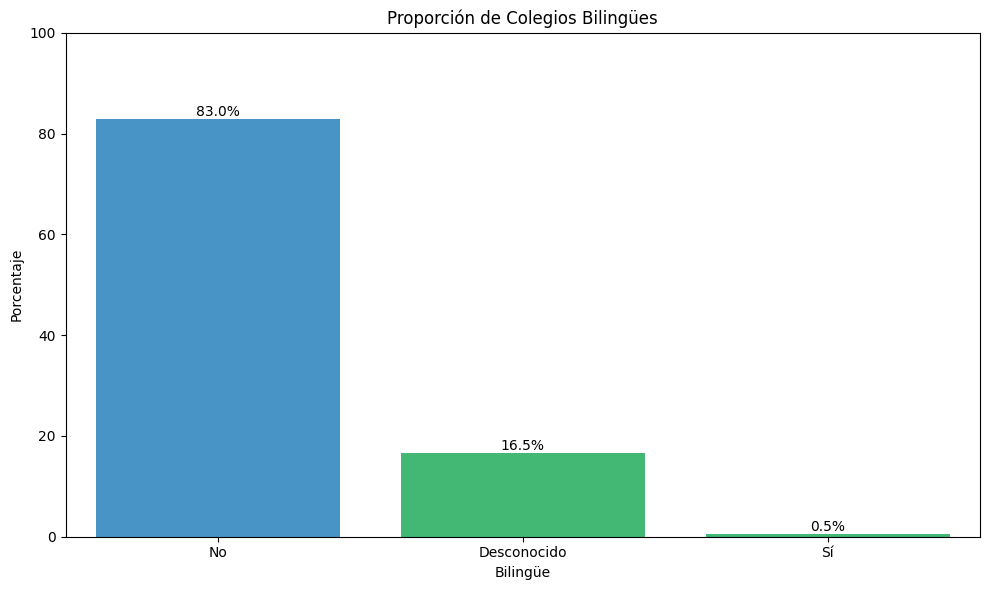

In [177]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_value_proportions(column):
    """
    Create a bar plot showing the proportions of unique values in a column with custom colors and labels.
    
    Parameters:
    column (pd.Series): The column to analyze
    """
    # Calculate value counts and proportions
    value_counts = column.value_counts()
    proportions = column.value_counts(normalize=True) * 100

    # Create custom labels
    custom_labels = {'N': 'No', 'S': 'Sí', 'unknown': 'Desconocido'}
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    
    # Use different colors for the bars
    colors = ['#3498db', '#2ecc71', '#2ecc71']  # Blue and Green
    sns.barplot(x=proportions.index.map(custom_labels), y=proportions.values, palette=colors)
    
    plt.title('Proporción de Colegios Bilingües')
    plt.xlabel('Bilingüe')
    plt.ylabel('Porcentaje')
    plt.ylim(0, 100)
    
    # Add percentage labels on top of bars
    for i, v in enumerate(proportions.values):
        plt.text(i, v, f'{v:.1f}%', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
   

# Call the function on the col_bilingue column
plot_value_proportions(data1['cole_bilingue'])

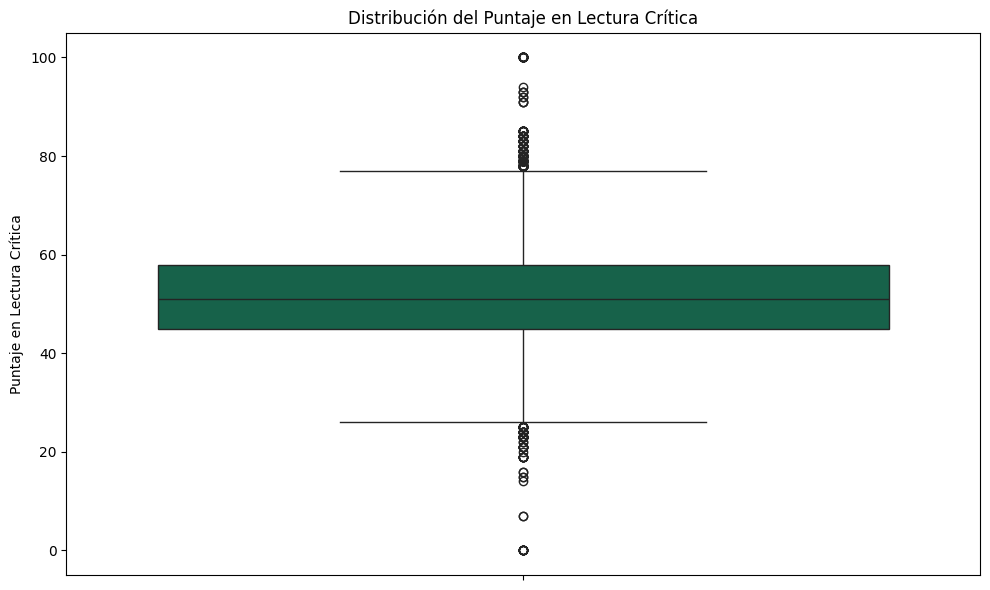

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(y='punt_lectura_critica', data=data1, color='#0B6E4F')  
plt.title('Distribución del Puntaje en Lectura Crítica')
plt.ylabel('Puntaje en Lectura Crítica')
plt.tight_layout()
plt.show()


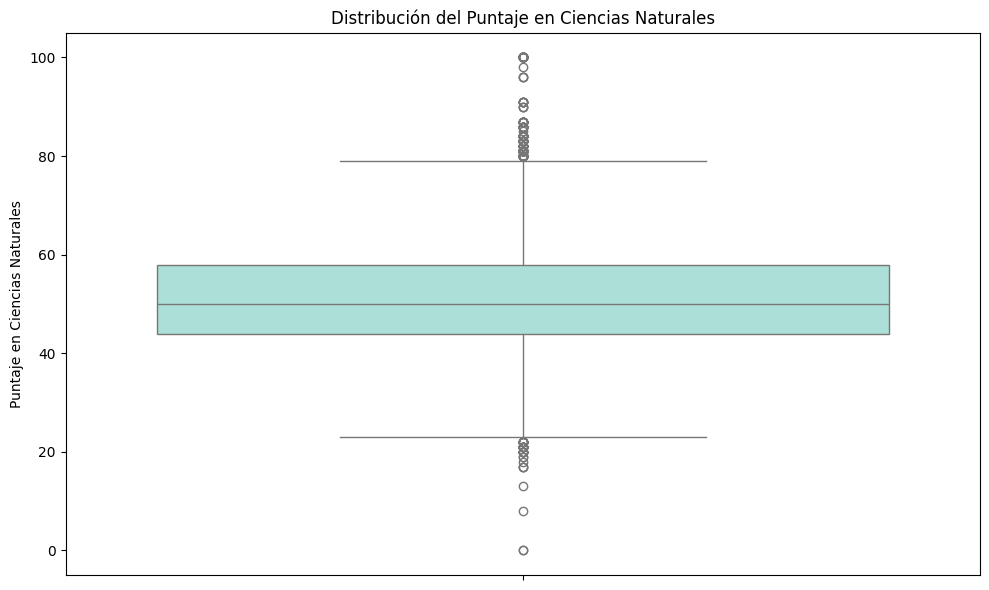

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(y='punt_c_naturales', data=data1, color='#A2E8DD')  
plt.title('Distribución del Puntaje en Ciencias Naturales')
plt.ylabel('Puntaje en Ciencias Naturales')
plt.tight_layout()
plt.show()

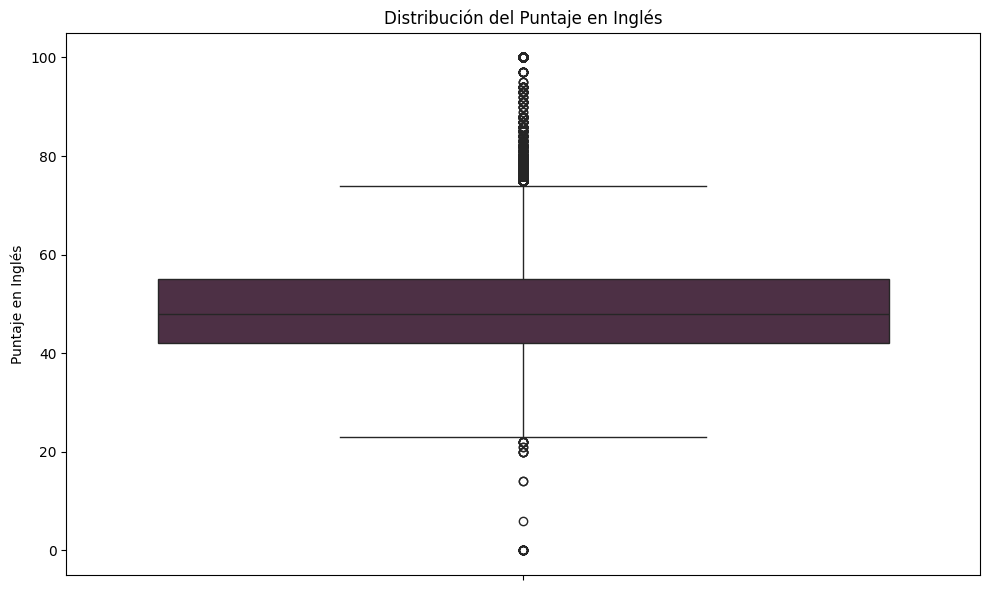

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(y='punt_ingles', data=data1, color='#522B47')  
plt.title('Distribución del Puntaje en Inglés')
plt.ylabel('Puntaje en Inglés')
plt.tight_layout()
plt.show()


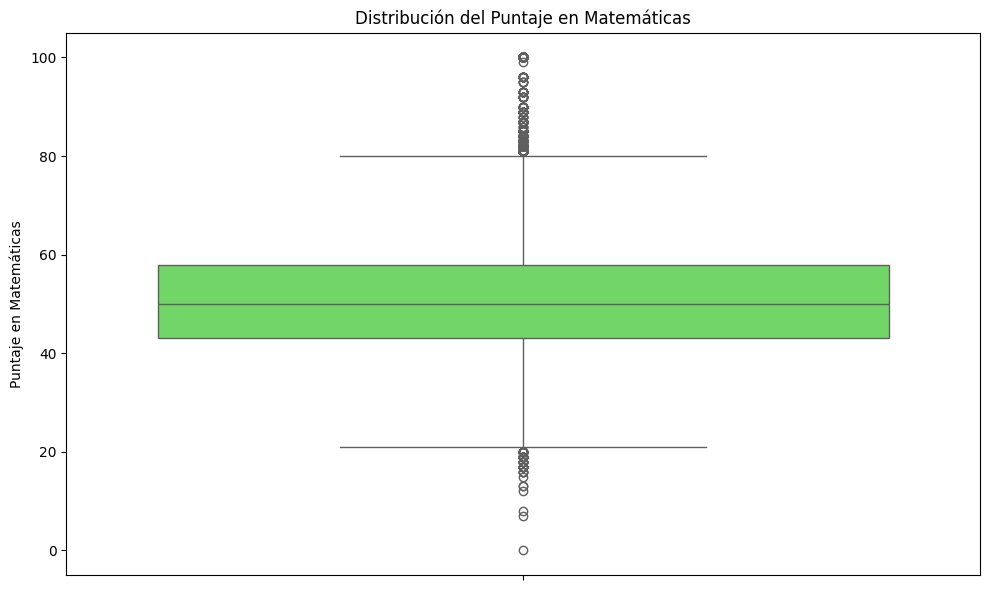

In [181]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(y='punt_matematicas', data=data1, color='#62e755')  
plt.title('Distribución del Puntaje en Matemáticas')
plt.ylabel('Puntaje en Matemáticas')
plt.tight_layout()
plt.show()



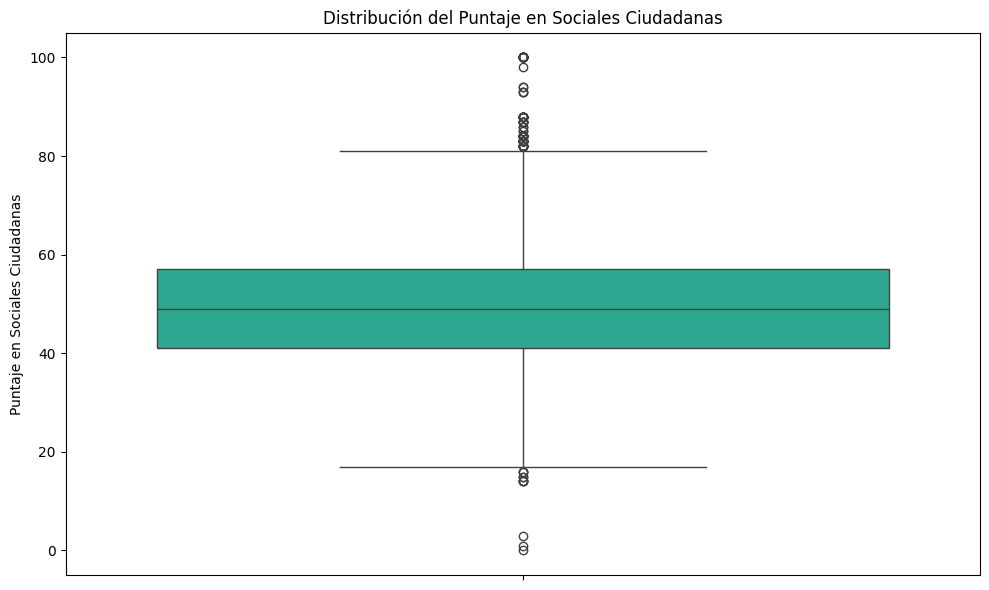

In [182]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(y='punt_sociales_ciudadanas', data=data1, color='#1abc9c')  
plt.title('Distribución del Puntaje en Sociales Ciudadanas')
plt.ylabel('Puntaje en Sociales Ciudadanas')
plt.tight_layout()
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_1744\780497273.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='fami_tieneinternet', y='punt_global', data=data1, palette=['#3498db', '#2ecc71'])
C:\Users\USER\AppData\Local\Temp\ipykernel_1744\780497273.py:5: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(x='fami_tieneinternet', y='punt_global', data=data1, palette=['#3498db', '#2ecc71'])


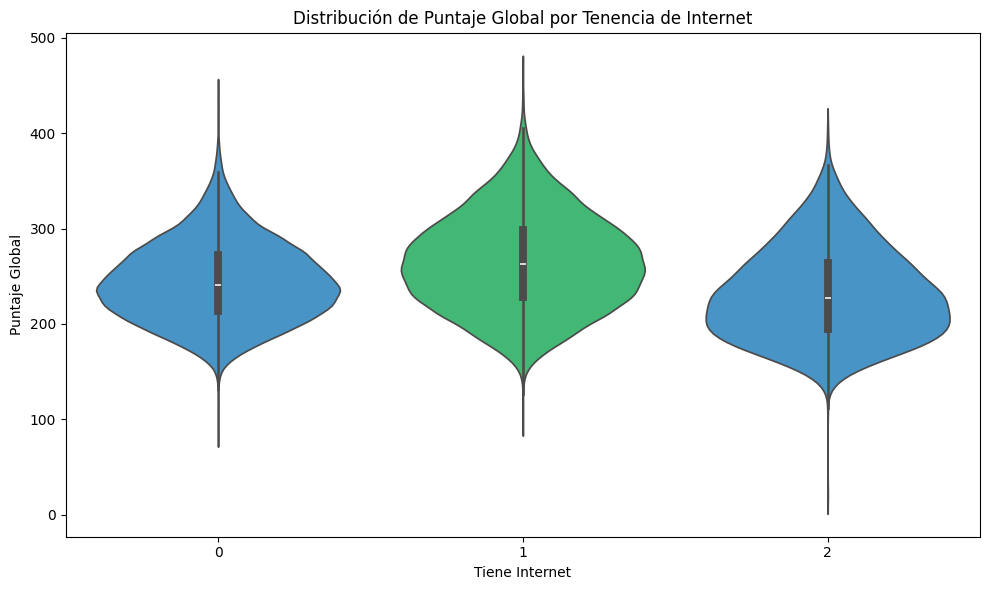

Summary Statistics by Internet Access:
                      count        mean        std   min    25%    50%    75%  \
fami_tieneinternet                                                              
0                   44104.0  244.350694  41.755517  81.0  214.0  241.0  272.0   
1                   36085.0  264.790162  50.012054  95.0  228.0  263.0  299.0   
2                    2413.0  231.618317  47.923349  21.0  195.0  227.0  264.0   

                      max  
fami_tieneinternet         
0                   447.0  
1                   469.0  
2                   406.0  


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.violinplot(x='fami_tieneinternet', y='punt_global', data=data1 )
plt.title('Distribución de Puntaje Global por Tenencia de Internet')
plt.xlabel('Tiene Internet')
plt.ylabel('Puntaje Global')
plt.tight_layout()
plt.show()

# Additionally, print some summary statistics
print("Summary Statistics by Internet Access:")
print(data1.groupby('fami_tieneinternet')['punt_global'].describe())

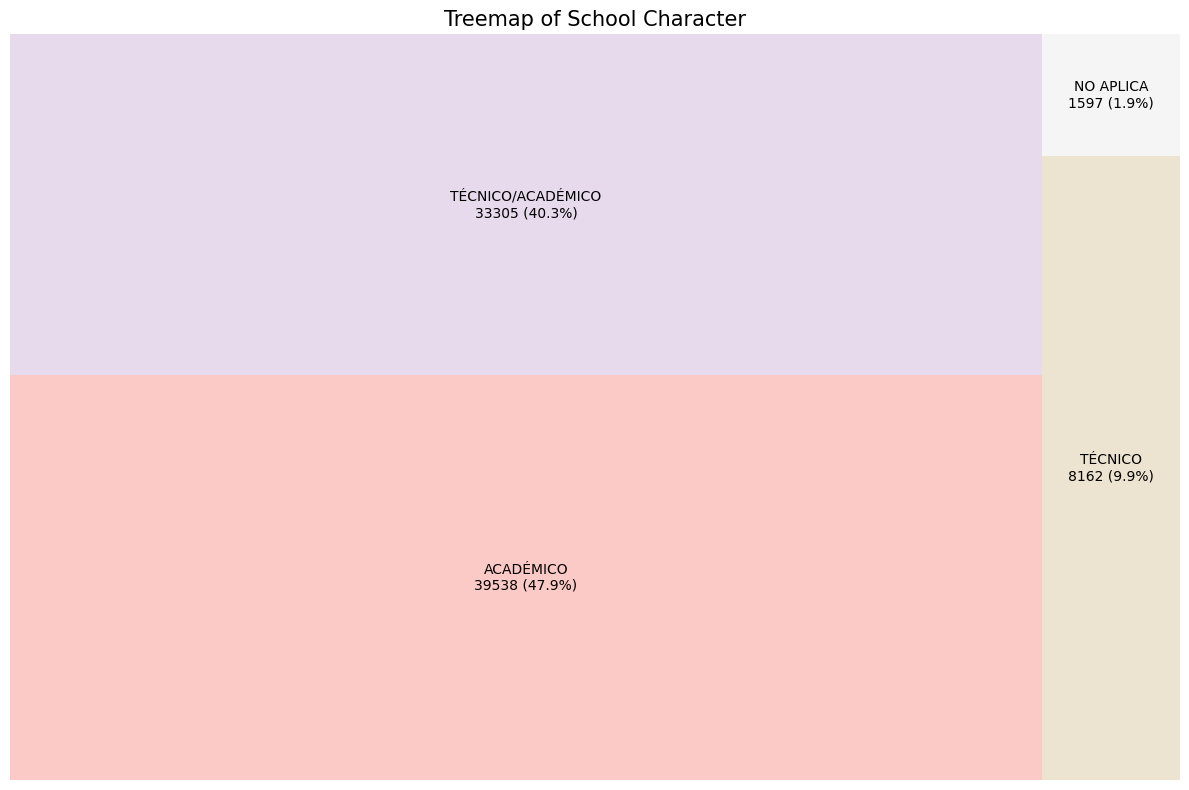

In [184]:
import matplotlib.pyplot as plt
import squarify
import numpy as np

# Calculate value counts
caracter_counts = data1['cole_caracter'].value_counts()

# Create color palette
colors = plt.cm.Pastel1(np.linspace(0, 1, len(caracter_counts)))

plt.figure(figsize=(12, 8))
squarify.plot(
    sizes=caracter_counts.values, 
    label=[f'{index}\n{count} ({count/len(data1)*100:.1f}%)' 
           for index, count in caracter_counts.items()], 
    color=colors, 
    alpha=0.7
)
plt.title('Treemap of School Character', fontsize=15)
plt.axis('off')
plt.tight_layout()
plt.show()


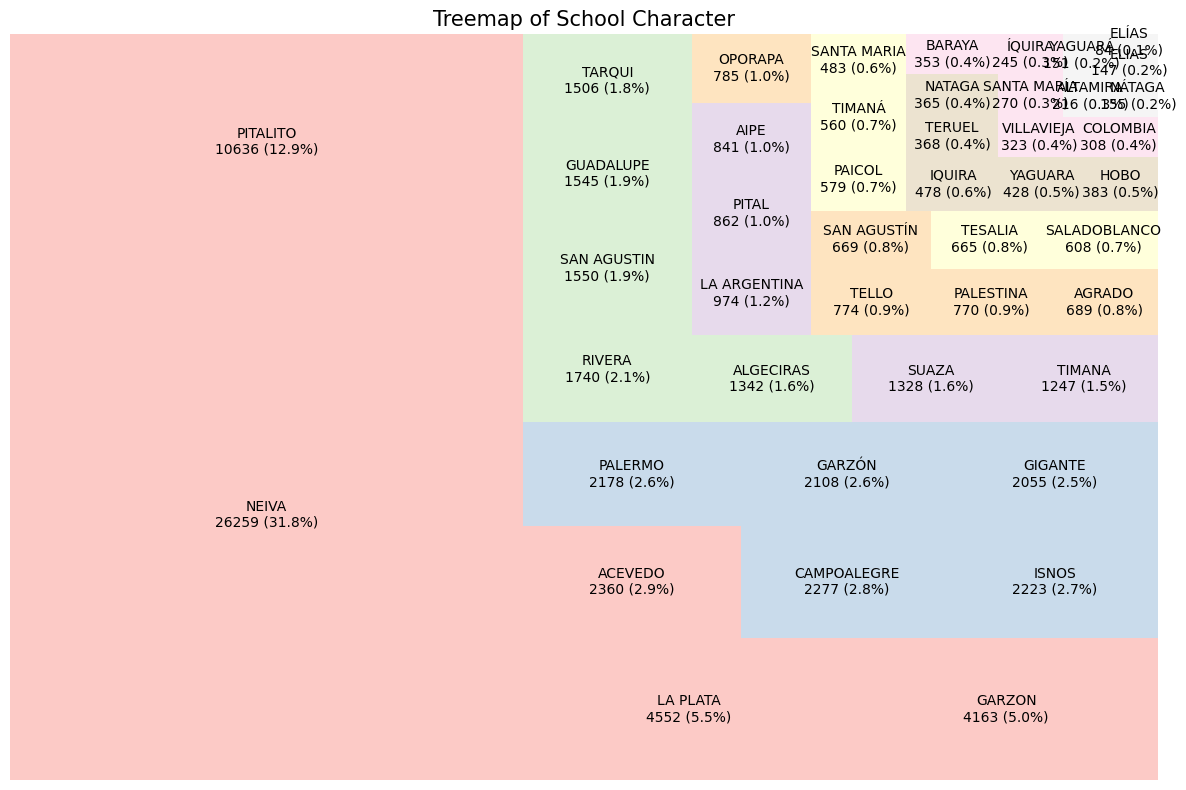

In [186]:
import matplotlib.pyplot as plt
import squarify
import numpy as np

# Calculate value counts
caracter_counts = data1['cole_mcpio_ubicacion'].value_counts()

# Create color palette
colors = plt.cm.Pastel1(np.linspace(0, 1, len(caracter_counts)))

plt.figure(figsize=(12, 8))
squarify.plot(
    sizes=caracter_counts.values, 
    label=[f'{index}\n{count} ({count/len(data1)*100:.1f}%)' 
           for index, count in caracter_counts.items()], 
    color=colors, 
    alpha=0.7
)
plt.title('Treemap of School Character', fontsize=15)
plt.axis('off')
plt.tight_layout()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_1744\1344934954.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='periodo', y='punt_global', data=data1, palette=['#16697A', '#BBA0CA','#82C0CC', '#CA054D', '#FFA62B'])
C:\Users\USER\AppData\Local\Temp\ipykernel_1744\1344934954.py:5: UserWarning: 
The palette list has fewer values (5) than needed (11) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(x='periodo', y='punt_global', data=data1, palette=['#16697A', '#BBA0CA','#82C0CC', '#CA054D', '#FFA62B'])


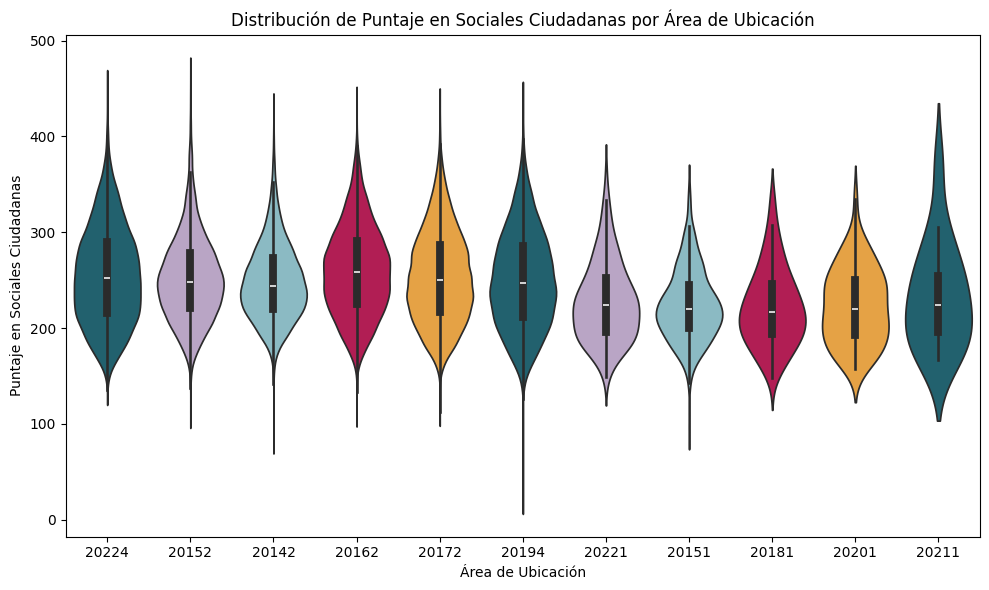

In [197]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.violinplot(x='periodo', y='punt_global', data=data1, palette=['#16697A', '#BBA0CA','#82C0CC', '#CA054D', '#FFA62B'])
plt.title('Distribución de Puntaje en Sociales Ciudadanas por Área de Ubicación')
plt.xlabel('Área de Ubicación')
plt.ylabel('Puntaje en Sociales Ciudadanas')
plt.tight_layout()
plt.show()

